# Sub-clustering "Mixed States" cluster

In [ ]:
%matplotlib inline

In [ ]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad

In [ ]:
library(Seurat)
library(ggplot2)
library(cowplot)

#Load the data
xenopus.combined <- readRDS(file = "scXeLaev.rds")



In [ ]:
clusters<- data.frame(table(Idents(xenopus.combined)))[['Var1']]

In [ ]:
require(scales)

# Create vector with levels of object@ident
# identities <- levels(xenopus.combined[['seurat_clusters']])
# print(identities)
# Create vector of default ggplot2 colors
my_color_palette <- hue_pal()(length(clusters))

# Subclustering "Mixed States" cluster

In [ ]:
xenopus.9 <- subset(xenopus.combined,idents=c('9'))

xenopus.9.list <- SplitObject(xenopus.9, split.by = "orig.ident")
xenopus.9.list <- xenopus.9.list[c("SIGAH5", "SIGAH12","SIGAB2")]
for (i in 1:length(xenopus.9.list)) {
    #pancreas.list[[i]] <- NormalizeData(pancreas.list[[i]], verbose = FALSE)
    print(xenopus.9.list[[i]])
    xenopus.9.list[[i]] <- FindVariableFeatures(xenopus.9.list[[i]], 
                                selection.method = "vst",nfeatures = 2000, verbose = FALSE)
}
xenopus.9.anchors <- FindIntegrationAnchors(object.list = xenopus.9.list,
                                          k.filter=10,dims = 1:10, k.score=10,
                                            anchor.features = 2000)

xenopus.9.combined <- IntegrateData(anchorset = xenopus.9.anchors, k.weight=10 ,dims = 1:10)
DefaultAssay(xenopus.9.combined) <- "integrated"
xenopus.9.combined <- ScaleData(xenopus.9.combined, verbose = FALSE)
xenopus.9.combined <- RunPCA(xenopus.9.combined, npcs = 30, verbose = FALSE)

In [ ]:
xenopus.9.combined <- RunUMAP(xenopus.9.combined, reduction = "pca", dims = 1:20)
#xenopus.combined <- RunTSNE(xenopus.combined, reduction = "pca", dims = 1:20)
xenopus.9.combined <- FindNeighbors(xenopus.9.combined, reduction = "pca", dims = 1:20,k.param=20)
xenopus.9.combined <- FindClusters(xenopus.9.combined, resolution =0.5)

In [ ]:
table(Idents(xenopus.9.combined))
table(Idents(xenopus.9.combined), xenopus.9.combined$stim)
table(Idents(xenopus.9.combined), xenopus.9.combined$isnt)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


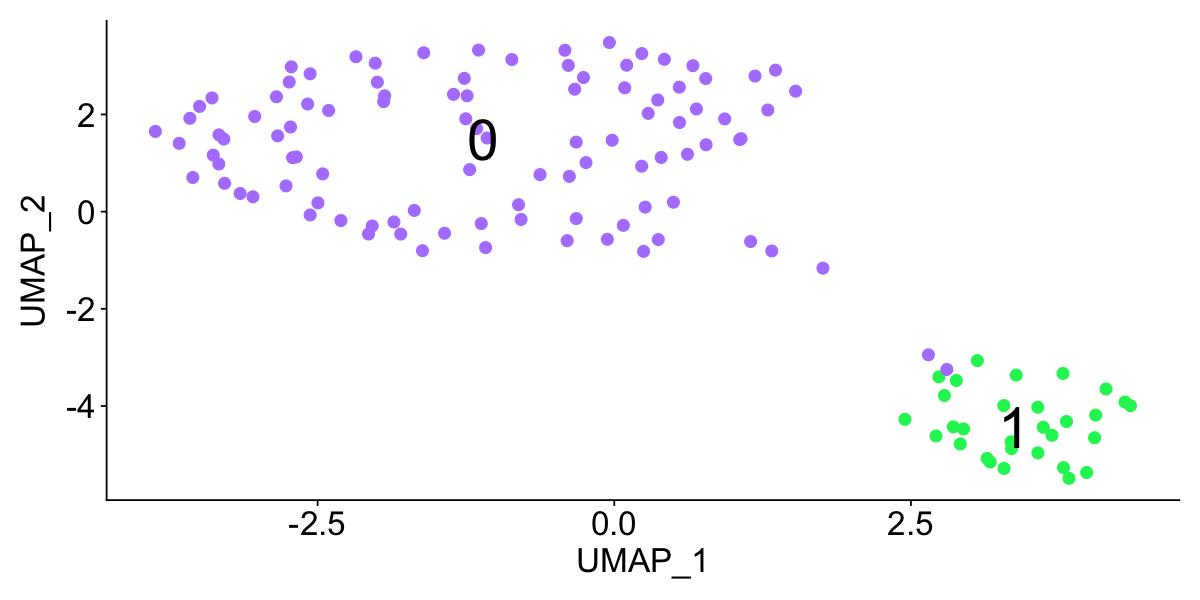

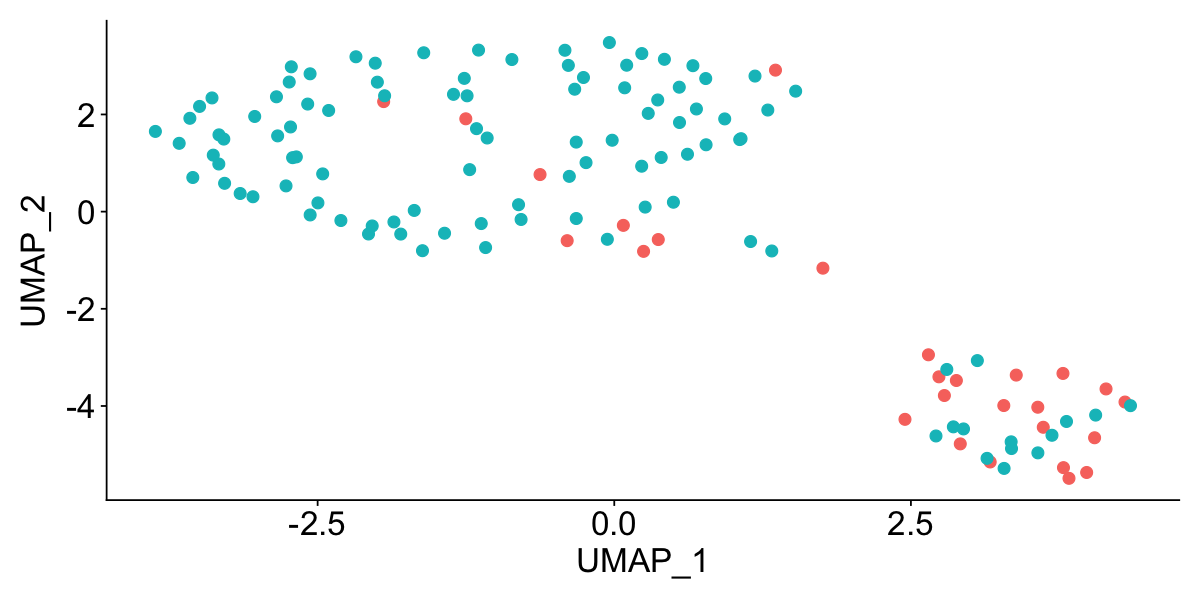

In [9]:
require(scales)
options(repr.plot.width=10, repr.plot.height=5)

cols.use <- list(seurat_clusters=hue_pal()(11)[9],'#0AF25F',hue_pal()(13)[12])
# pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/DRAFT_PAPER/FIGURES/UMAP_sub_cluster_9.pdf",width=6,height=5)
p1 <- DimPlot(xenopus.9.combined,pt.size=3, reduction = "umap", cols=cols.use, label = TRUE,
       label.size=12)
p1 + theme(legend.position = "none",text = element_text(size=20),axis.text.x = element_text(size = 20),axis.text.y = element_text(size = 20)) 
# dev.off()
# pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/DRAFT_PAPER/FIGURES/UMAP_sub_cluster_9_condition.pdf",width=6,height=5)
p2 <- DimPlot(xenopus.9.combined,pt.size=3, reduction = "umap", group.by = "isnt")
p2 + theme(legend.position = "none",text = element_text(size=20),axis.text.x = element_text(size = 20),axis.text.y = element_text(size = 20)) 
# dev.off()

#plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))


In [10]:
saveRDS(xenopus.9.combined, file = "xenopus_subcluster9.rds")

In [ ]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3)
#plot batches and clusters
p1 <- DimPlot(xenopus.9.combined, reduction = "umap", group.by = "stim")#, dims=c(10,10))
p2 <- DimPlot(xenopus.9.combined, reduction = "umap", label = TRUE)#, dims=c(10,10))
plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))
plt

#plot IVF/NT condition and clusters
p1 <- DimPlot(xenopus.9.combined, reduction = "umap", group.by = "isnt")#, dims=c(10,10))
p2 <- DimPlot(xenopus.9.combined, reduction = "umap", label = TRUE)#, dims=c(10,10))
plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))
plt

In [ ]:
#Save subclusters of cluster 9 to show them in the UMAP
clus.9.idents <- xenopus.9.combined[['seurat_clusters']]

In [24]:
write.csv(clus.9.idents,'labels_subclustering_cl9.csv',row.names=TRUE)

In [ ]:
DefaultAssay(xenopus.9.combined) <- "RNA"

DE.genes.9 <- FindMarkers(xenopus.9.combined, ident.1 = 0,ident.2 = 1,
only.pos = FALSE,min.pct = 0.25, logfc.threshold = 0.25)
#DE.genes.38 <- DE.genes.38[(DE.genes.38$avg_logFC) > 1,]
DE.genes.9 <- DE.genes.9[(DE.genes.9$p_val_adj) < 0.1,]

In [ ]:
DE.genes.9.pos<- DE.genes.9[DE.genes.9['avg_logFC']>0,]
DE.genes.9.neg<- DE.genes.9[DE.genes.9['avg_logFC']<0,]

In [ ]:
write.csv(as.data.frame(DE.genes.9.pos), file = "DE_genes_9_up_in_0.csv",row.names=TRUE)
write.csv(as.data.frame(DE.genes.9.neg), file = "DE_genes_9_up_in_1.csv",row.names=TRUE)